# Seaborn playground

Going through the following tutorial while fixing various deprecation warnings thrown by Seaborn, Matplotlib and Pandas.

The original tutorial is found here: [The Ultimate Python Seaborn Tutorial: Gotta Catch ‘Em All
](https://elitedatascience.com/python-seaborn-tutorial)

In [1]:
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd

%matplotlib inline
filename = 'pokemon.csv'
df = pd.read_csv(filename, index_col=0, encoding = "ISO-8859-1")

df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


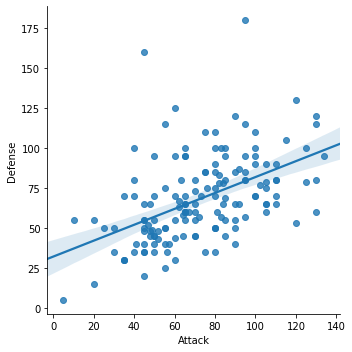

In [2]:
g = sns.lmplot(x='Attack', y='Defense', data=df)


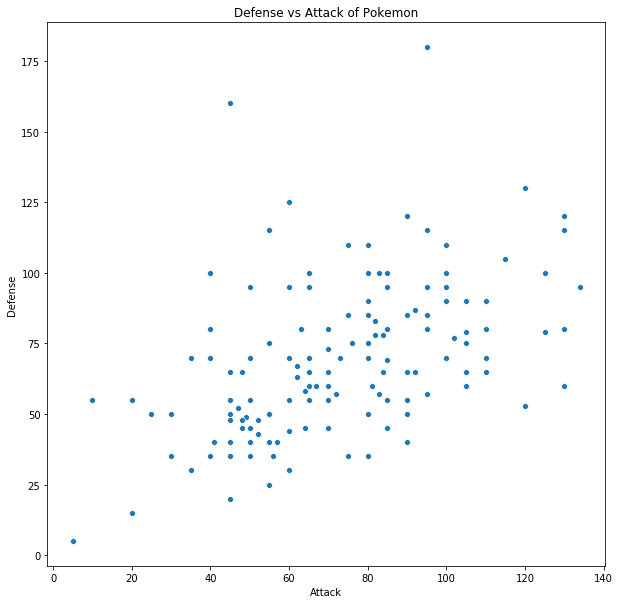

In [3]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='Attack', y='Defense', data=df)
_ = plt.title("Defense vs Attack of Pokemon")

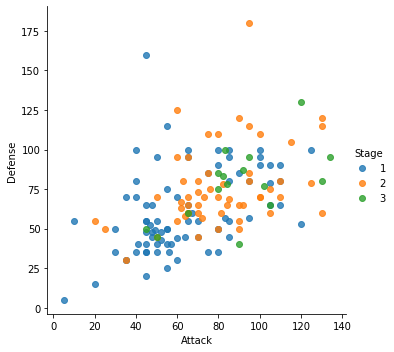

In [4]:
sns.lmplot(x='Attack', y='Defense', hue='Stage', data=df, fit_reg=False)

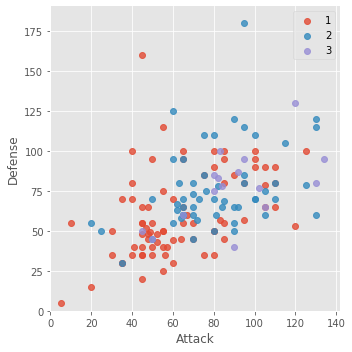

In [5]:
plt.style.use('ggplot')
sns.lmplot(x='Attack', y='Defense', data=df, hue='Stage', fit_reg=False, legend=False)
plt.xlim(0, None)
plt.ylim(0, None)
plt.legend(loc=1)

In [6]:
print(plt.style.available)

['seaborn-pastel', 'fivethirtyeight', 'seaborn-white', 'seaborn', 'seaborn-muted', 'bmh', 'grayscale', 'fast', 'seaborn-notebook', 'dark_background', 'seaborn-ticks', 'seaborn-dark', 'seaborn-whitegrid', 'seaborn-deep', 'seaborn-dark-palette', 'seaborn-paper', 'seaborn-talk', 'seaborn-poster', '_classic_test', 'tableau-colorblind10', 'Solarize_Light2', 'seaborn-bright', 'seaborn-darkgrid', 'seaborn-colorblind', 'classic', 'ggplot']


<Figure size 720x576 with 0 Axes>

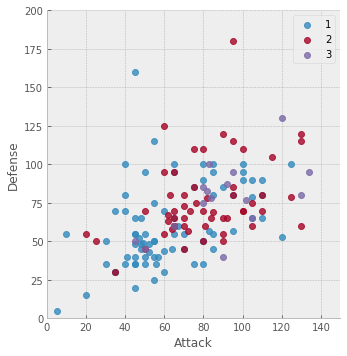

In [7]:
plt.figure(figsize=(10, 8))
plt.style.use('bmh')
sns.lmplot(x='Attack', y='Defense', data=df, hue='Stage', fit_reg=False, legend=False)
plt.xlim(0, 150)
plt.ylim(0, 200)
plt.legend(loc=1)

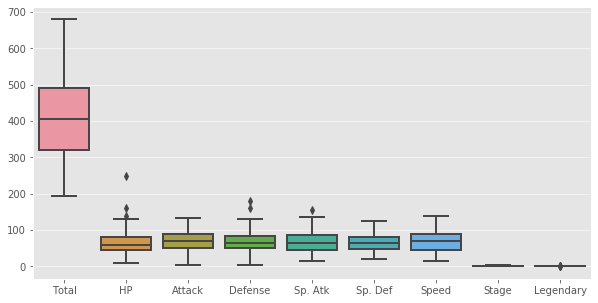

In [8]:
plt.style.use('ggplot')

plt.figure(figsize=(10, 5))

sns.boxplot(data=df)

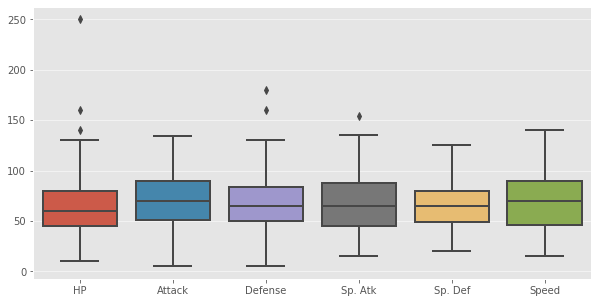

In [9]:
stats_df = df.drop(['Total', 'Stage', 'Legendary'], axis=1)

plt.figure(figsize=(10, 5))
sns.boxplot(data=stats_df)

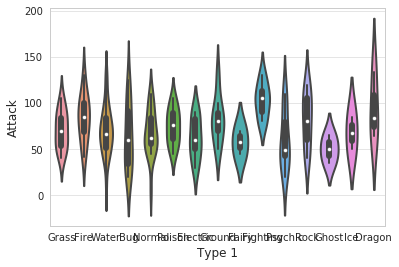

In [10]:
sns.set_style('whitegrid')
sns.violinplot(x='Type 1', y='Attack', data=df)

Text(0.5, 0, 'Type 1 Attack')

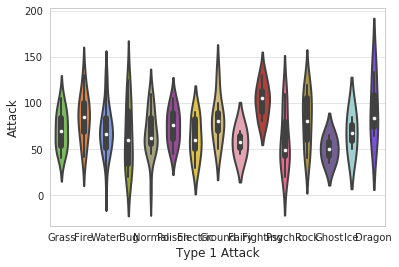

In [11]:
pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]

g = sns.violinplot(x='Type 1', y='Attack', data=df, palette=pkmn_type_colors)
g.set_xlabel('Type 1 Attack')

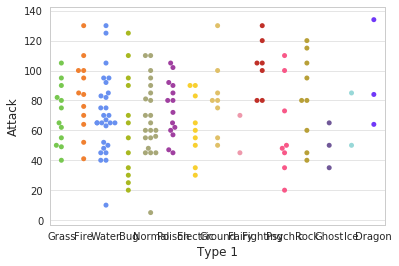

In [12]:
sns.swarmplot(x='Type 1', y='Attack', data=df, palette=pkmn_type_colors)

Text(0.5, 1.0, 'Attack by Type')

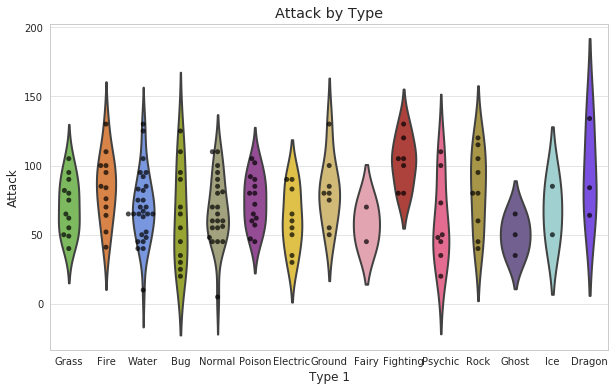

In [13]:
plt.figure(figsize=(10, 6))

sns.violinplot(x='Type 1', y='Attack', data=df, palette=pkmn_type_colors, inner=None)
sns.swarmplot(x='Type 1', y='Attack', data=df, color='k', alpha=0.7)

plt.title("Attack by Type")

In [14]:
stats_df.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
#,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45
2,Ivysaur,Grass,Poison,60,62,63,80,80,60
3,Venusaur,Grass,Poison,80,82,83,100,100,80
4,Charmander,Fire,NaN,39,52,43,60,50,65
5,Charmeleon,Fire,NaN,58,64,58,80,65,80


In [15]:
melted_df = pd.melt(stats_df, id_vars=['Name', 'Type 1', 'Type 2'], var_name='Stat')

melted_df.head()

,Name,Type 1,Type 2,Stat,value
0,Bulbasaur,Grass,Poison,HP,45
1,Ivysaur,Grass,Poison,HP,60
2,Venusaur,Grass,Poison,HP,80
3,Charmander,Fire,NaN,HP,39
4,Charmeleon,Fire,NaN,HP,58


In [16]:
melted_df[melted_df['Name'] == 'Bulbasaur'].head(6)

,Name,Type 1,Type 2,Stat,value
0,Bulbasaur,Grass,Poison,HP,45
151,Bulbasaur,Grass,Poison,Attack,49
302,Bulbasaur,Grass,Poison,Defense,49
453,Bulbasaur,Grass,Poison,Sp. Atk,65
604,Bulbasaur,Grass,Poison,Sp. Def,65
755,Bulbasaur,Grass,Poison,Speed,45


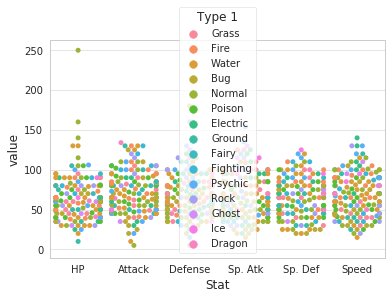

In [17]:
sns.swarmplot(x='Stat', y='value', data=melted_df, hue='Type 1')

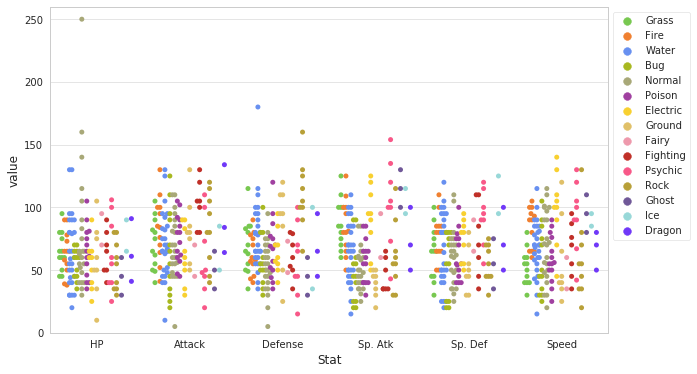

In [18]:
plt.figure(figsize=(10, 6))

sns.swarmplot(x='Stat', y='value', data=melted_df, hue='Type 1', dodge=True, palette=pkmn_type_colors)

plt.ylim(0, 260)

plt.legend(bbox_to_anchor=(1, 1), loc=2)

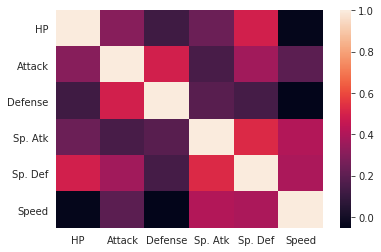

In [19]:
corr = stats_df.corr()

sns.heatmap(corr)

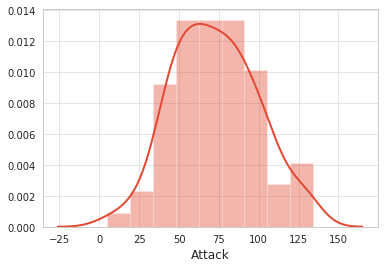

In [20]:
sns.distplot(df['Attack'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

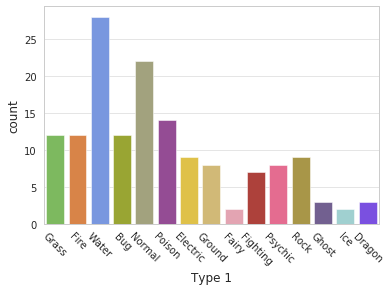

In [21]:
sns.countplot(x='Type 1', data=df, palette=pkmn_type_colors)

plt.xticks(rotation=-45)

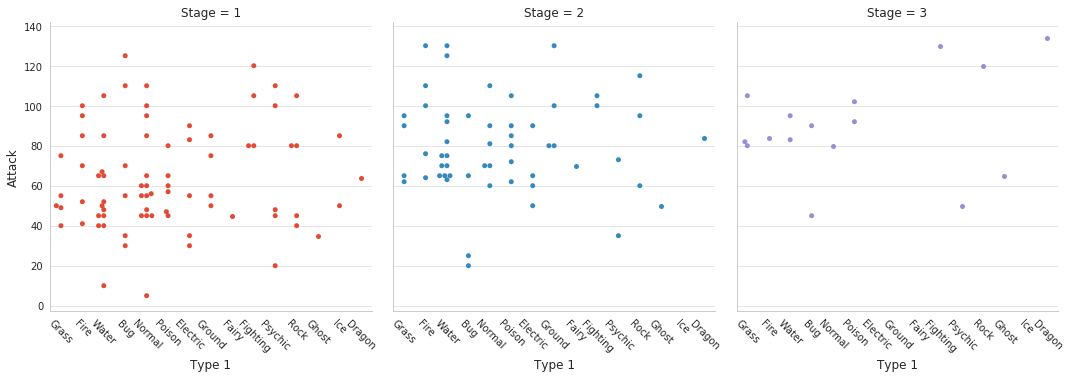

In [22]:
g = sns.catplot(x='Type 1',
                y='Attack',
                data=df,
                hue='Stage',
                col='Stage',
                kind='swarm')

g.set_xticklabels(rotation=-45)